# Analyse du jeux de données des avis clients

Analyse du jeu "reviews_datas" qui posait problème lors de la précédente introduction dans le jeu de données que je voulais créer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

customers_datas = pd.read_csv("olist_customers_dataset.csv")
geolocation_datas = pd.read_csv("olist_geolocation_dataset.csv")
order_items_datas = pd.read_csv("olist_order_items_dataset.csv", parse_dates=[4])
order_payments_datas = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_datas = pd.read_csv("olist_order_reviews_dataset.csv", parse_dates=[5,6])
orders_datas = pd.read_csv("olist_orders_dataset.csv", parse_dates=[3, 4, 5, 6, 7])
products_datas = pd.read_csv("olist_products_dataset.csv")
sellers_datas = pd.read_csv("olist_sellers_dataset.csv")

In [2]:
order_reviews_datas

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15,2017-12-16 01:29:43


Pour commencer, je vais regarder la feature "review_id" qui devrait être unique et "order_id" pour confirmer qu'une commande peut avoir plusieurs commentaires comme vu précédemment.

Ensuite, je vais faire du tri dans les variables et éventuellement en créer des nouvelles.

In [3]:
order_reviews_datas["review_id"].value_counts()

2172867fd5b1a55f98fe4608e1547b4b    3
abbfacb2964f74f6487c9c10ac46daa6    3
2d6ac45f859465b5c185274a1c929637    3
832acec9bbf4efe65c3fb6423d8b4ed7    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
1ee1ab82bfc7812f9bc3fc13eed58c38    1
3206a2afb959946a223eafa1f972efb1    1
601080b8c0cb7f308e9560435e89b229    1
20ca25b79aecd18e0d5bb142ac83481c    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: review_id, Length: 99173, dtype: int64

In [4]:
order_reviews_datas.loc[order_reviews_datas["review_id"] == order_reviews_datas["review_id"].value_counts().reset_index().iloc[2,0]]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4808,2d6ac45f859465b5c185274a1c929637,ef66cc60de5221417b5fb81b1c42de85,1,NaN,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07,2018-04-07 21:13:05
27867,2d6ac45f859465b5c185274a1c929637,41c284ffd871324eadf06fc989583619,1,NaN,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07,2018-04-07 21:13:05
65024,2d6ac45f859465b5c185274a1c929637,8e17072ec97ce29f0e1f111e598b0c85,1,NaN,Comprei 3 unidades do produto vieram 2 unidade...,2018-04-07,2018-04-07 21:13:05


In [5]:
order_reviews_datas["order_id"].value_counts()

03c939fd7fd3b38f8485a0f95798f1f6    3
df56136b8031ecd28e200bb18e6ddb2e    3
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
8ef17147aad160f7780239dcf0acb400    2
                                   ..
00a250dbdb3153cc6ecf4d3f07ef6a17    1
9996aad294da648f199033d51534f004    1
5837a2c844decae8a778657425f6d664    1
5e82591b43cb83a7dd419ff564e44d04    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: order_id, Length: 99441, dtype: int64

In [6]:
order_reviews_datas.loc[order_reviews_datas["order_id"] == order_reviews_datas["order_id"].value_counts().reset_index().iloc[0,0]]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
8329,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Um ponto negativo que achei foi a cobrança de ...,2018-03-20,2018-03-21 02:28:23
51931,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,NaN,NaN,2018-03-29,2018-03-30 00:29:09
70005,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06,2018-03-06 19:50:32


On peut voir qu'il existe des entrées avec les mêmes "reviews_id" qui sont liés par la date. Apparemment, les scores semblent aussi être les mêmes.

Pour ce qui est du tri par "order_id", il ne semble y avoir de schéma à première vue mais on peut trouver plusieurs commentaires pour une même commande. Néanmoins, je vais m'attarder sur cette feature car intrasèquement, elle réprésente le client.
Donc par commande, je vais:
* noter le nombre d'avis
* faire la moyenne des notes
* garder la note initiale
* calculer la variation entre la première et la dernière note
* garder la date de creation du premier commentaire
* calculer l'intervalle de temps entre le premier commentaire et le dernier

Ces étapes permettront de limiter les avis à un individu car j'avais vu plus tôt que ça posait un problème de multiplication de données inutiles lors de l'agrégation avec les jeux "Orders" et "Order_items".

In [7]:
def new_reviews_datas(data, sort_col, review_col, date_col):
    ### value_counts() to get unique order_id and nb of entries for each order_id
    # order_id
    # nb de scores
    order_id_counts = data[sort_col].value_counts().reset_index()
    order_id_counts = order_id_counts.rename(columns={order_id_counts.columns[0]: "order_id", order_id_counts.columns[1]: "nb_score"})

    df = pd.DataFrame([], columns=["order_id", "nb_score", "score_mean", "init_score", "diff_score", "init_date", "diff_date"])

    ### get order_id and relative nb_ind
    ### open subset of data on each order_id
    for i in range(len(order_id_counts)):
        order_id = order_id_counts.loc[[i], "order_id"].values[0]
        nb_ind = order_id_counts.loc[[i], "nb_score"].values[0]

        subset = data.loc[data[sort_col] == order_id, :]
        subset = subset.sort_values(by=date_col, ascending=True)

    ### subset.groupby(order_id)[review_score].mean().reset_index()
    # moyenne des notes
        score_mean = subset.groupby(sort_col)[review_col].mean().values[0]

    ### subset[review_score].head(1)
    # score initial
    ### subset[review_score].tail(1) - subset[review_score].head(1)
    # variation entre première et dernière note
        init_score = subset[review_col].head(1).values[0]
        last_score = subset[review_col].tail(1).values[0]
        diff_score = last_score - init_score

    ### subset[review_creation_date].head(1)
    # date initiale
    ### subset[review_creation_date].tail(1) - subset[review_creation_date].head(1)
    # itervalle de temps entre première et dernière note
        init_date = subset[date_col].head(1).values[0]
        last_date = subset[date_col].tail(1).values[0]
        diff_date = last_date - init_date

    ### intégrer les valeurs dans le dataset final
        tmp_datas = pd.DataFrame([[order_id, nb_ind, score_mean, init_score, diff_score, init_date, diff_date]], 
            columns=["order_id", "nb_score", "score_mean", "init_score", "diff_score", "init_date", "diff_date"])
        df = pd.concat([df, tmp_datas], ignore_index=True)

    return df
        

In [8]:
# f_reviews_datas = new_reviews_datas(order_reviews_datas, "order_id", "review_score", "review_creation_date")

# f_reviews_datas
# f_reviews_datas.to_csv("POLIST_07_reviews_datas.csv", index=False)

In [9]:
f_reviews_datas = pd.read_csv("POLIST_07_reviews_datas.csv")
f_reviews_datas

,order_id,nb_score,score_mean,init_score,diff_score,init_date,diff_date
0,03c939fd7fd3b38f8485a0f95798f1f6,3,3.333333,3,1,2018-03-06 00:00:00,23 days
1,df56136b8031ecd28e200bb18e6ddb2e,3,5.000000,5,0,2017-02-07 00:00:00,2 days
2,c88b1d1b157a9999ce368f218a407141,3,4.333333,5,0,2017-07-21 00:00:00,1 days
3,8e17072ec97ce29f0e1f111e598b0c85,3,1.000000,1,0,2018-04-07 00:00:00,7 days
4,8ef17147aad160f7780239dcf0acb400,2,4.500000,5,-1,2017-06-27 00:00:00,7 days
...,...,...,...,...,...,...,...
99436,00a250dbdb3153cc6ecf4d3f07ef6a17,1,2.000000,2,0,2017-12-17 00:00:00,0 days
99437,9996aad294da648f199033d51534f004,1,4.000000,4,0,2018-01-19 00:00:00,0 days
99438,5837a2c844decae8a778657425f6d664,1,1.000000,1,0,2017-08-19 00:00:00,0 days
99439,5e82591b43cb83a7dd419ff564e44d04,1,4.000000,4,0,2017-09-28 00:00:00,0 days


Maintenant que j'ai remanié le jeu de données je peux l'agréger avec celui des commandes "Ord_datas" créé plus tôt.

In [10]:
ord_datas = pd.read_csv("POLIST_03_ord_datas.csv")
ord_datas

,order_id,order_purchase_timestamp,customer_unique_id,customer_state,order_status,delivering_time,delivered_before_time
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,SP,delivered,8.0,True
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,BA,delivered,12.0,True
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,GO,delivered,9.0,True
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,RN,delivered,13.0,True
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,SP,delivered,2.0,True
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,SP,delivered,8.0,True
99437,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,SP,delivered,22.0,True
99438,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,BA,delivered,24.0,True
99439,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,RJ,delivered,17.0,True


Je constate qu'il y a bien le même nombre d'individus dans chaque jeu ce qui était le but recherché.

In [11]:
datas = ord_datas.merge(f_reviews_datas, on="order_id")
datas.head()

,order_id,order_purchase_timestamp,customer_unique_id,customer_state,order_status,delivering_time,delivered_before_time,nb_score,score_mean,init_score,diff_score,init_date,diff_date
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,SP,delivered,8.0,True,1,4.0,4,0,2017-10-11 00:00:00,0 days
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,BA,delivered,12.0,True,1,4.0,4,0,2018-08-08 00:00:00,0 days
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,GO,delivered,9.0,True,1,5.0,5,0,2018-08-18 00:00:00,0 days
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,RN,delivered,13.0,True,1,5.0,5,0,2017-12-03 00:00:00,0 days
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,SP,delivered,2.0,True,1,5.0,5,0,2018-02-17 00:00:00,0 days


Je vais m'attarder sur les dates de ce nouveau jeu de données.

Je vais:
* définir les dates min et max des achats
* définir une date de référence => probablement la date d'achat la plus récente
* finalement je ne vais pas garder les dates de création des notes ni le nombre de jours entre les différents commentaires
* formatter les dates d'achats dans un format plus adapté. Pour le moment je pense à un format du type AAAA-MM

Il faudra aussi que j'approfondisse la feature "order_status"

In [12]:
datas = datas.drop(columns=["init_date", "diff_date"])

Format initial de "order_purchase_timestamp".

In [13]:
type(datas.loc[0, 'order_purchase_timestamp'])

str

Il faut donc convertir la feature dans un format date

In [14]:
datas['order_purchase_timestamp'] = pd.to_datetime(datas['order_purchase_timestamp'])

In [15]:
type(datas.loc[0, 'order_purchase_timestamp'])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
print(f"Achat le plus vieux: {datas['order_purchase_timestamp'].min()}")
print(f"Achat le plus récent: {datas['order_purchase_timestamp'].max()}")
months = (datas['order_purchase_timestamp'].max() - datas['order_purchase_timestamp'].min()).days / 365 * 12
print(f"Le jeu de données court sur: {np.round(months, 3)} mois, soit {np.round(months / 12, 3)} ans")
print(f"Il y a en moyenne {np.round(len(datas) / months, 3)} commandes par mois")

Achat le plus vieux: 2016-09-04 21:15:19
Achat le plus récent: 2018-10-17 17:30:18
Le jeu de données court sur: 25.381 mois, soit 2.115 ans
Il y a en moyenne 3917.958 commandes par mois


En premier lieu, je vais créer plusieurs variables:
* la date d'achat sans les heures
* le mois-année d'achat
* l'année d'achat
* le trimestre-année d'achat
* le semestre-année d'achat

Le but sera de trouver la fréquence à laquelle le jeu de données doit être mis à jour.


In [17]:
pd.DatetimeIndex(datas['order_purchase_timestamp']).quarter



Int64Index([4, 3, 3, 4, 1, 3, 2, 2, 1, 3,
            ...
            4, 4, 4, 1, 1, 1, 1, 3, 1, 1],
           dtype='int64', name='order_purchase_timestamp', length=99441)

In [18]:
datas["purchase_date"] = pd.DatetimeIndex(datas['order_purchase_timestamp']).date
datas["purchase_y_m"] = pd.DatetimeIndex(datas['order_purchase_timestamp']).year.map(str) + pd.DatetimeIndex(datas['order_purchase_timestamp'
    ]).month.map(str)
datas["purchase_y_q"] = pd.DatetimeIndex(datas['order_purchase_timestamp']).year.map(str) + pd.DatetimeIndex(datas['order_purchase_timestamp'
    ]).quarter.map(str)
datas["purchase_y_s"] = np.nan
datas["purchase_y_s"] = datas["purchase_y_s"].mask(pd.DatetimeIndex(datas["order_purchase_timestamp"]).quarter / 2 <= 1, pd.DatetimeIndex(
    datas["order_purchase_timestamp"]).year.map(str) + "1")
datas["purchase_y_s"] = datas["purchase_y_s"].mask(pd.DatetimeIndex(datas["order_purchase_timestamp"]).quarter / 2 > 1, pd.DatetimeIndex(
    datas["order_purchase_timestamp"]).year.map(str) + "2")
datas["purchase_y"] = pd.DatetimeIndex(datas["order_purchase_timestamp"]).year

Je n'ai plus besoin de la feature "order_purchase_timestamp"

In [19]:
datas = datas.drop(columns="order_purchase_timestamp")

In [20]:
def unify_months(x):
    if len(x[4:]) > 1:
        return int(x)
    else:
        return int(x[:4] + "0" + x[4:])

In [21]:
datas["purchase_y_m"] = datas["purchase_y_m"].apply(lambda x: unify_months(x))
datas["purchase_y_q"] = datas["purchase_y_q"].astype(np.int64)
datas["purchase_y_s"] = datas["purchase_y_s"].astype(np.int64)

In [22]:
datas

,order_id,customer_unique_id,customer_state,order_status,delivering_time,delivered_before_time,nb_score,score_mean,init_score,diff_score,purchase_date,purchase_y_m,purchase_y_q,purchase_y_s,purchase_y
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,delivered,8.0,True,1,4.0,4,0,2017-10-02,201710,20174,20172,2017
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA,delivered,12.0,True,1,4.0,4,0,2018-07-24,201807,20183,20182,2018
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,GO,delivered,9.0,True,1,5.0,5,0,2018-08-08,201808,20183,20182,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,RN,delivered,13.0,True,1,5.0,5,0,2017-11-18,201711,20174,20172,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,SP,delivered,2.0,True,1,5.0,5,0,2018-02-13,201802,20181,20181,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,SP,delivered,8.0,True,1,5.0,5,0,2017-03-09,201703,20171,20171,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,SP,delivered,22.0,True,1,4.0,4,0,2018-02-06,201802,20181,20181,2018
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,BA,delivered,24.0,True,1,5.0,5,0,2017-08-27,201708,20173,20172,2017
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,RJ,delivered,17.0,True,1,2.0,2,0,2018-01-08,201801,20181,20181,2018


In [23]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder

c_u_id = pd.DataFrame(OrdinalEncoder().fit_transform(datas[["customer_unique_id", "customer_state", "order_status"]]), 
    columns=["customer_unique_id", "customer_state", "order_status"])

X = datas[["nb_score", "score_mean", "init_score", "diff_score"]].copy()
X = pd.concat([c_u_id, X], axis=1)
X
# Xtsne = TSNE(n_components=2, perplexity= 30, learning_rate= "auto", init= "pca", n_iter= 3000).fit_transform(X)

,customer_unique_id,customer_state,order_status,nb_score,score_mean,init_score,diff_score
0,46728.0,25.0,3.0,1,4.0,4,0
1,65829.0,4.0,3.0,1,4.0,4,0
2,22015.0,8.0,3.0,1,5.0,5,0
3,46675.0,19.0,3.0,1,5.0,5,0
4,43056.0,25.0,3.0,1,5.0,5,0
...,...,...,...,...,...,...,...
99436,37416.0,25.0,3.0,1,5.0,5,0
99437,82103.0,25.0,3.0,1,4.0,4,0
99438,43443.0,4.0,3.0,1,5.0,5,0
99439,30364.0,18.0,3.0,1,2.0,2,0


In [24]:
# Xtsne_datas =pd.DataFrame(Xtsne, columns=["PC1", "PC2"])
# Xtsne_datas.to_csv("POLIST_07_tsne.csv", index=False)

In [25]:
# Xtsne = pd.read_csv("POLIST_07_tsne.csv")

In [26]:
# fig = plt.figure(figsize=(10, 10))
# plt.scatter(Xtsne.iloc[:, 0], Xtsne.iloc[:, 1], c= datas["purchase_y"])
# plt.show()

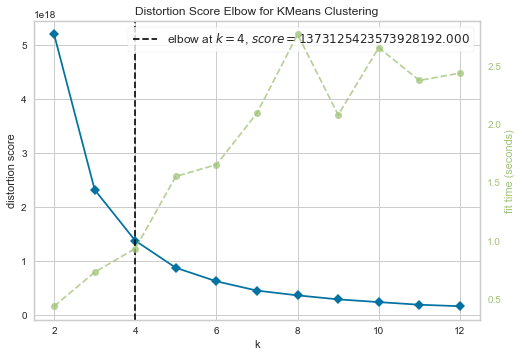

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


X_bis = datas["purchase_date"].values.astype("datetime64[s]").astype(np.int64).reshape(-1, 1).copy()

km = KMeans()

visualizer = KElbowVisualizer(km, k=(2, 13))

visualizer.fit(X_bis)
visualizer.poof()
    

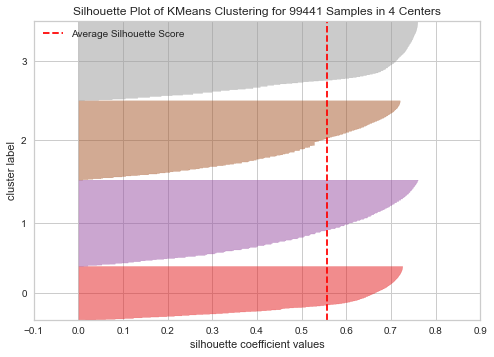

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 99441 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
sil_visualizer = SilhouetteVisualizer(KMeans(4))

sil_visualizer.fit(X_bis)
sil_visualizer.poof()

In [29]:
kmean = KMeans(4).fit(X_bis)
clusters = kmean.cluster_centers_


In [30]:
clust = []
for i in range(len(clusters)):
    clust.append(clusters[i][0] * 10**9)

labels = kmean.labels_


***Essayer de trouver les points extrêmes des clusters***

In [31]:
labels_datas = pd.DataFrame(datas["purchase_date"], columns=["purchase_date"])

In [32]:
labels_datas["labels"] = labels

In [33]:
tmp_dates = pd.DataFrame(pd.to_datetime(clust).date)

tmp_dates.rename({0: "dates"}, axis= 1, inplace=True)

nb_mois = []
nb_commandes = []
d_min = []
d_max = []
for i in range(len(tmp_dates)):
    d_min.append(labels_datas.loc[labels_datas["labels"] == i, "purchase_date"].min())
    d_max.append(labels_datas.loc[labels_datas["labels"] == i, "purchase_date"].max())

tmp_dates["date_min"] = sorted(d_min)
tmp_dates["date_max"] = sorted(d_max)

for i in range(len(tmp_dates)):
    nb_commandes.append(labels_datas.loc[(labels_datas["purchase_date"] >= tmp_dates.loc[i, "date_min"]) & (labels_datas["purchase_date"] 
        <= tmp_dates.loc[i, "date_max"]), "purchase_date"].count())
    nb_mois.append(np.round((tmp_dates.loc[i, "date_max"] - tmp_dates.loc[i, "date_min"]).days / 30.42))

tmp_dates["nb_mois"] = nb_mois
tmp_dates["nb_commandes"] = nb_commandes

tmp_dates

,dates,date_min,date_max,nb_mois,nb_commandes
0,2017-04-30,2016-09-04,2017-07-24,11.0,18053
1,2018-02-26,2017-07-25,2017-12-22,5.0,26332
2,2017-10-17,2017-12-23,2018-04-28,4.0,28781
3,2018-06-28,2018-04-29,2018-10-17,6.0,26275


In [34]:
print(f"Nb moy de commandes: {tmp_dates['nb_commandes'].mean()}")

print(f"Nb moy de mois: {tmp_dates['nb_mois'].mean()}")

Nb moy de commandes: 24860.25
Nb moy de mois: 6.5


~~Je voulais voir si des périodes de temps se démarquaient avec le TSNE mais rien de flagrant apparaît. Néanmoins,~~ un Kmeans sur la feature "purchase_date" met en avant 4 clusters avec la méthode KElbowVisualizer ce qui confirmé par SilouhetteVisualizer qui montre des clusters relativements homogènes.


In [35]:
print(f"On sait que le jeu de données court sur {np.round(months, 1)} mois")
print(f"Donc en découpant cet intervalle de temps par 4 (le nombre de clusters), cela donne des sous-jeux de données de " + 
    f"{np.round(months, 1) / 4} mois chacun.")

On sait que le jeu de données court sur 25.4 mois
Donc en découpant cet intervalle de temps par 4 (le nombre de clusters), cela donne des sous-jeux de données de 6.35 mois chacun.


Je sais maintenant que la segmentation peut être mise à jour tous les 6 mois environ. En effet, je retrouve le même résultat de deux manières différentes.

Néanmoins, on peut voir aussi que le nombre de  commandes par cluster vaut environ 25 000.

En fait, le premier cluster mis à part, les périodes des clusters sont régulières (~5 mois), de même pour les commandes (~27000 commandes).

Pour le contrat de maintenance, je proposerai donc une maintenance soit tous les 6 mois, soit toutes les 25000 commandes. Cela peut être aussi tous les 6 mois ou toutes les 25000 commandes selon le premier critère arrivant en premier après chaque maintenance.

Comme énoncé plus haut, je vais me concentré sur la feature "order_status".

In [36]:
print(f"Il y a {datas['order_status'].nunique()} éléments uniques dans 'order_status'")
print(f" Ces derniers sont: {datas['order_status'].unique()} \nrépartis comme suit:")
datas["order_status"].value_counts()

Il y a 8 éléments uniques dans 'order_status'
 Ces derniers sont: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved'] 
répartis comme suit:


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Les status des commandes correspondent aux traductions suivantes:
* Delivered => livré
* Shipped => expédié
* Canceled => annulé
* Unavailable => indisponible
* Invoiced => facturé
* Processing => en traitement
* Created => créé
* Approved => approuvé

Je vais me concentrer sur les clients livrés car la commande a été effectuée de bout en bout et c'est avec ces derniers que je peux récupérer le plus de données pertinentes pour la segmentation.

In [37]:
s_datas = datas[datas["order_status"] == "delivered"].copy()
s_datas.drop("order_status", axis=1, inplace=True)
s_datas

,order_id,customer_unique_id,customer_state,delivering_time,delivered_before_time,nb_score,score_mean,init_score,diff_score,purchase_date,purchase_y_m,purchase_y_q,purchase_y_s,purchase_y
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,8.0,True,1,4.0,4,0,2017-10-02,201710,20174,20172,2017
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA,12.0,True,1,4.0,4,0,2018-07-24,201807,20183,20182,2018
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,GO,9.0,True,1,5.0,5,0,2018-08-08,201808,20183,20182,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,RN,13.0,True,1,5.0,5,0,2017-11-18,201711,20174,20172,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,SP,2.0,True,1,5.0,5,0,2018-02-13,201802,20181,20181,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,SP,8.0,True,1,5.0,5,0,2017-03-09,201703,20171,20171,2017
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,SP,22.0,True,1,4.0,4,0,2018-02-06,201802,20181,20181,2018
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,BA,24.0,True,1,5.0,5,0,2017-08-27,201708,20173,20172,2017
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,RJ,17.0,True,1,2.0,2,0,2018-01-08,201801,20181,20181,2018


J'ai oublié d'intégrer une feature pour le nombre de jours écoulés depuis la dernière commande.


In [38]:
s_datas["days_last_purchase"] = (s_datas["purchase_date"].max() - s_datas["purchase_date"]).apply(lambda x: x.days)
s_datas

,order_id,customer_unique_id,customer_state,delivering_time,delivered_before_time,nb_score,score_mean,init_score,diff_score,purchase_date,purchase_y_m,purchase_y_q,purchase_y_s,purchase_y,days_last_purchase
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,SP,8.0,True,1,4.0,4,0,2017-10-02,201710,20174,20172,2017,331
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,BA,12.0,True,1,4.0,4,0,2018-07-24,201807,20183,20182,2018,36
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,GO,9.0,True,1,5.0,5,0,2018-08-08,201808,20183,20182,2018,21
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,RN,13.0,True,1,5.0,5,0,2017-11-18,201711,20174,20172,2017,284
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,SP,2.0,True,1,5.0,5,0,2018-02-13,201802,20181,20181,2018,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,SP,8.0,True,1,5.0,5,0,2017-03-09,201703,20171,20171,2017,538
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,SP,22.0,True,1,4.0,4,0,2018-02-06,201802,20181,20181,2018,204
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,BA,24.0,True,1,5.0,5,0,2017-08-27,201708,20173,20172,2017,367
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,RJ,17.0,True,1,2.0,2,0,2018-01-08,201801,20181,20181,2018,233


In [39]:
# s_datas.to_csv("POLIST_07_ord_reviews.csv", index=False)

Il me reste à agreger ce jeu de données nouvellement créé avec "order_payments" et "items_datas".